In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
df = pd.read_csv("21-12-21-datos.csv",
                 sep=";",
                 decimal=",",
                 parse_dates=['time_index'],
                 dayfirst=True,
                 index_col="time_index")

- `pm25`: particulas menores de 2.5 micras
- `pm10`: particulas menores de 10 micras

In [4]:
df

,temperature,relativehumidity,pm25,pm10,numberofincoming,numberofoutgoing,co2,ocupacion
time_index,,,,,,,,
2021-09-27 10:00:00,27.34,49.74,11.88,13.00,68.0,88.0,594.85,0.0
2021-09-27 10:25:00,27.66,49.45,6.75,7.75,186.0,265.0,590.77,0.0
2021-09-27 10:30:00,27.94,49.70,5.38,6.38,354.0,492.0,578.66,0.0
2021-09-27 10:35:00,28.03,48.59,4.71,5.71,80.0,114.0,581.25,0.0
2021-09-27 10:40:00,28.09,48.43,3.62,4.62,467.0,642.0,586.75,0.0
...,...,...,...,...,...,...,...,...
2021-12-31 23:35:00,18.81,50.12,19.40,20.40,0.0,0.0,409.35,0.0
2021-12-31 23:40:00,18.82,50.13,19.80,20.80,0.0,0.0,408.84,0.0
2021-12-31 23:45:00,18.78,50.07,20.80,21.80,0.0,0.0,408.72,0.0


In [5]:
df.describe()

,temperature,relativehumidity,pm25,pm10,numberofincoming,numberofoutgoing,co2,ocupacion
count,16855.000000,16855.000000,16855.000000,16855.000000,16855.000000,16855.000000,16855.000000,16855.000000
mean,22.487456,50.999004,3.550590,4.552409,110.615722,94.134144,576.060697,17.966123
std,2.429281,6.666113,3.552418,3.568857,166.734163,155.705077,256.753624,31.345801
min,16.910000,33.260000,0.000000,1.000000,0.000000,0.000000,406.000000,0.000000
25%,20.500000,45.545000,1.250000,2.250000,0.000000,0.000000,426.640000,0.000000
50%,22.870000,51.950000,2.430000,3.430000,0.000000,0.000000,459.070000,0.000000
75%,24.280000,55.420000,4.620000,5.620000,205.000000,135.000000,601.800000,18.000000
max,28.090000,68.880000,84.570000,86.570000,1604.000000,1434.000000,1913.750000,218.000000


# No todos los días tienen la misma cantidad de datos
**El maximo son:**  24 horas * 60 minutos_por_hora / 5 minutos_de_ventana = **288 filas**

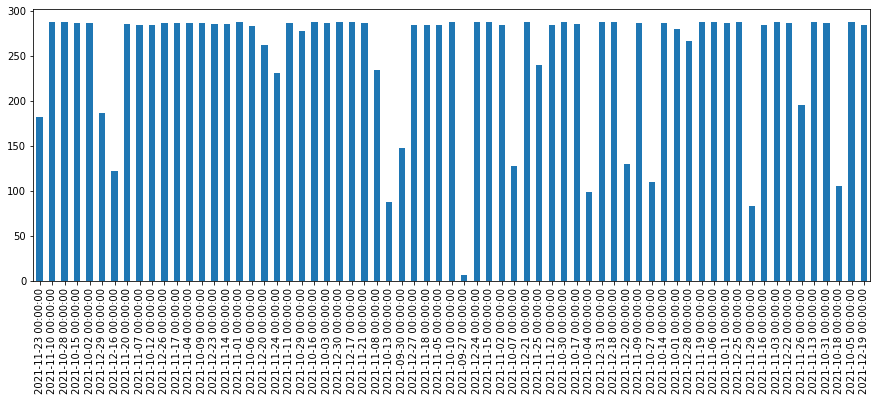

In [6]:
df.index.normalize().value_counts(sort=False).plot.bar(figsize=(15,5));

# Estos son los momentos (en azul) en los que no hay datos

In [7]:
df["gap_beg"] = df.index.to_series().diff(1).shift(-1) > pd.Timedelta('00:05:00')
df["gap_end"] = df.index.to_series().diff(1)           > pd.Timedelta('00:05:00')
df["gap"]     = df["gap_beg"] | df["gap_end"]

In [8]:
print("Hay", df["gap_beg"].sum(), "gaps")

Hay 93 gaps


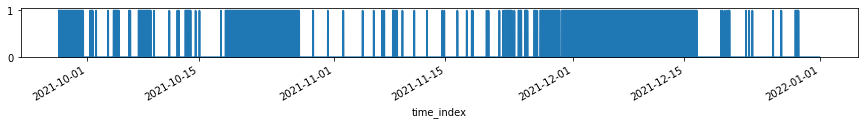

In [9]:
df["gap"].astype(int).plot.area(figsize=(15,1));

<AxesSubplot:xlabel='time_index'>

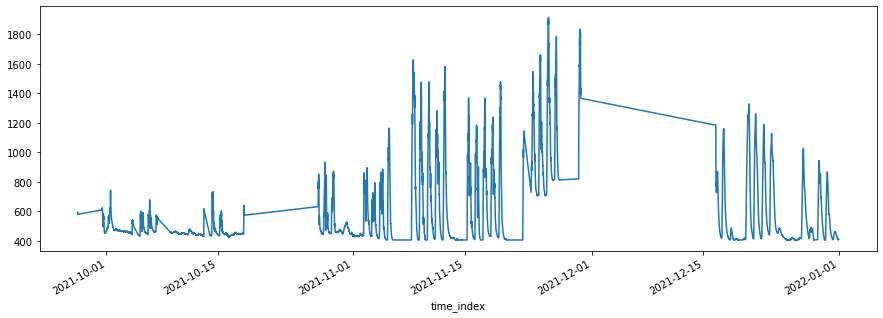

In [10]:
df["co2"].plot.line(figsize=(15,5))

In [11]:
def min_max_range(boolean_var, min_val, max_val):
    int_var_0_1 = boolean_var.astype(int)
    return int_var_0_1 * (max_val - min_val) + min_val

In [12]:
min_max_range(df_bueno["gap"], 2,4 )

NameError: name 'df_bueno' is not defined

In [13]:
def plot_var(filtered_df, var):
    min_val = filtered_df[var].min()
    max_val = filtered_df[var].max()
    
    min_max_range(filtered_df["gap"], min_val, max_val ).plot.area(figsize=(15,5))
    filtered_df[var].plot.line(figsize=(15,5), title=var)
    
    plt.ylim((min_val,max_val))
    plt.show()

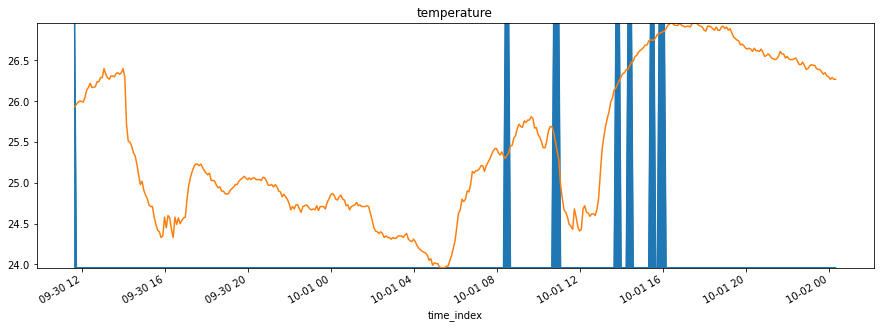

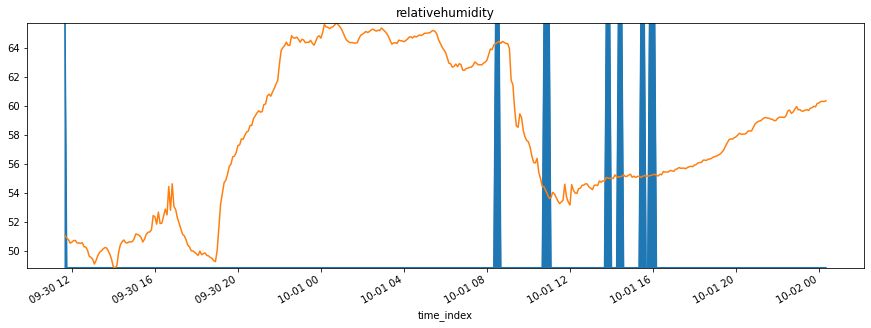

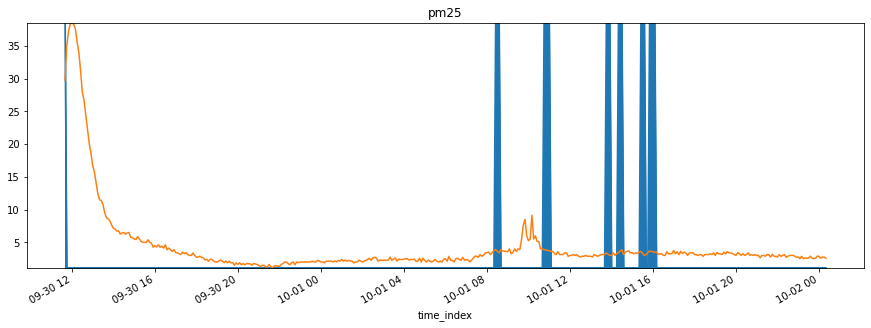

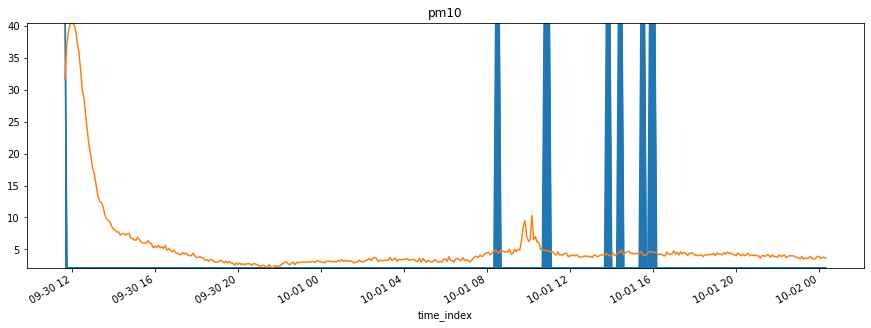

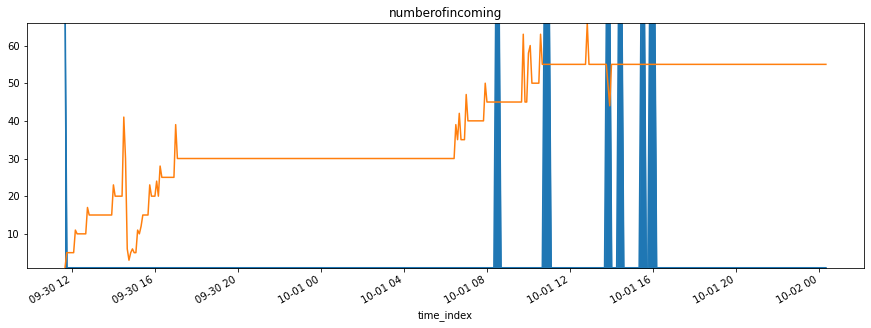

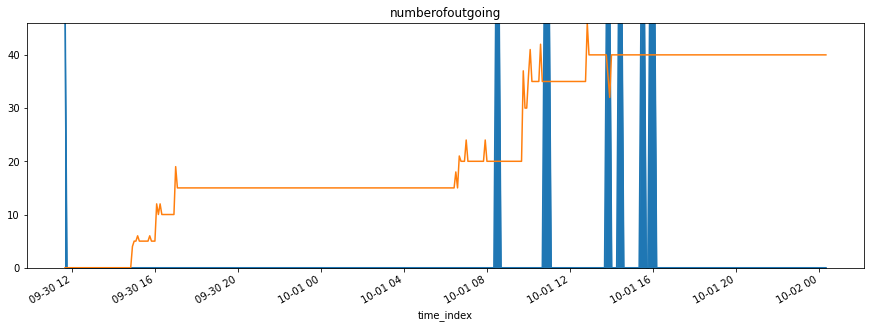

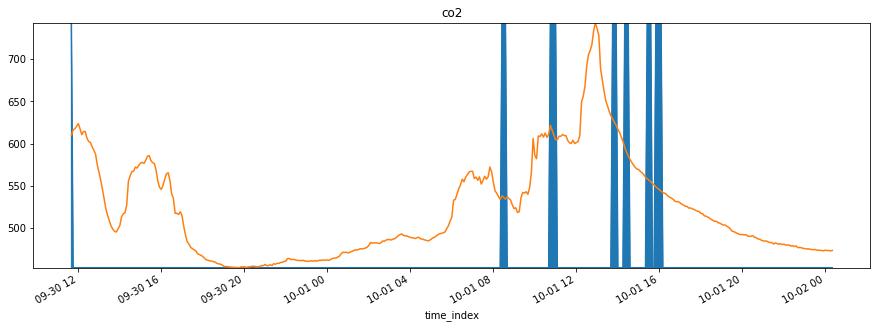

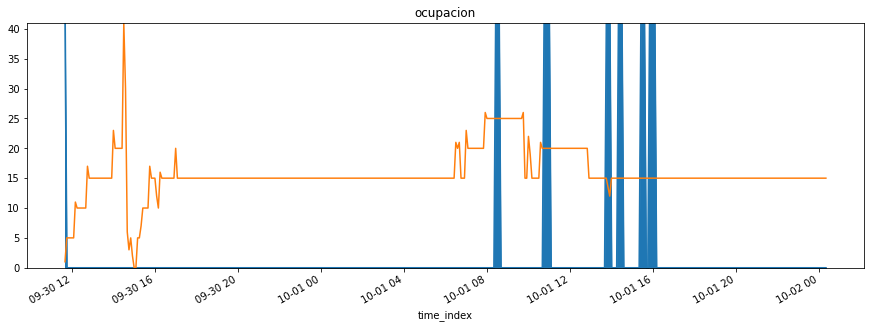

In [15]:
for var in df.columns[:-3]:
    plot_var(df.loc['2021-9-30 00:06:00':'2021-10-2 00:23:00'], var)

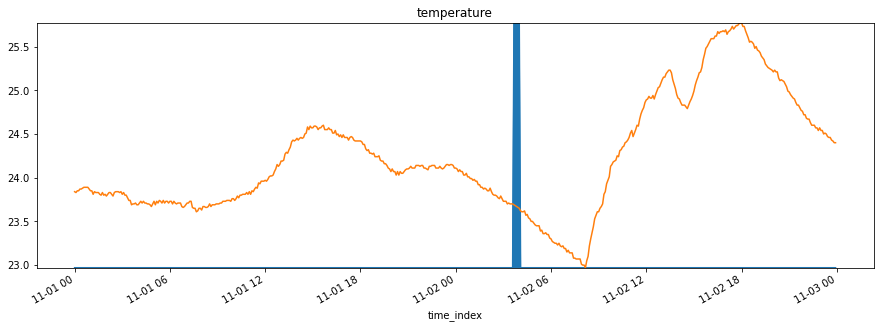

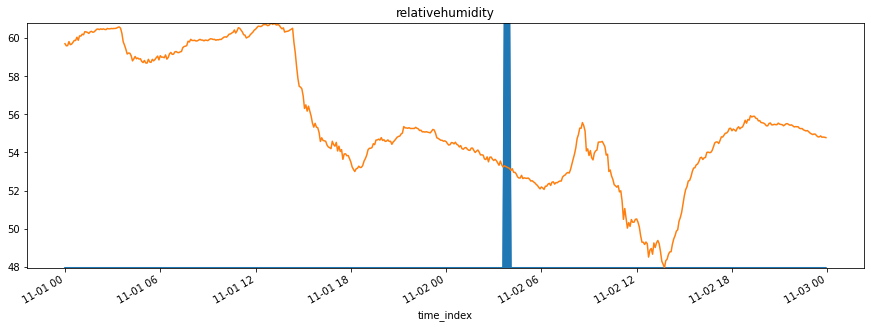

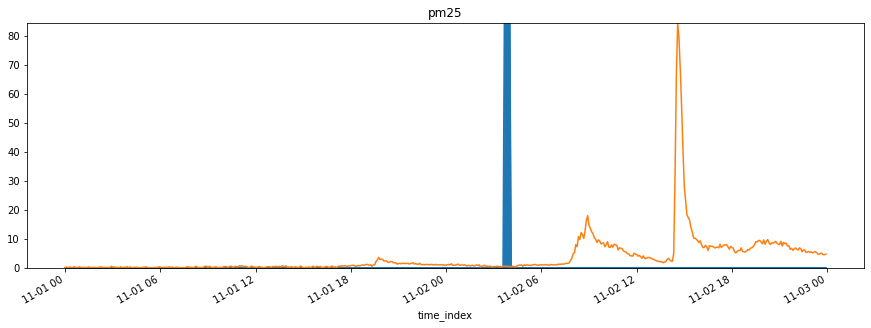

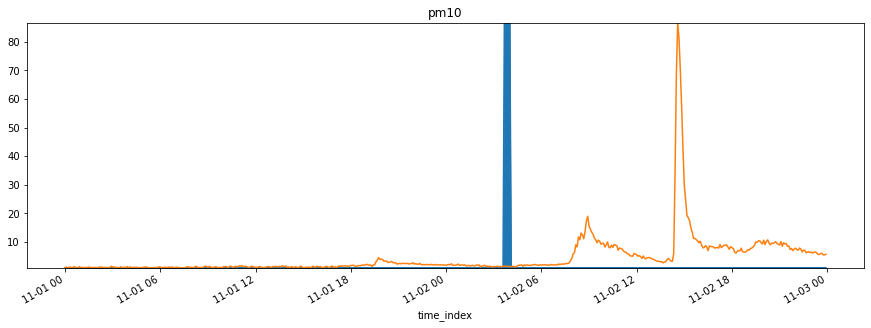

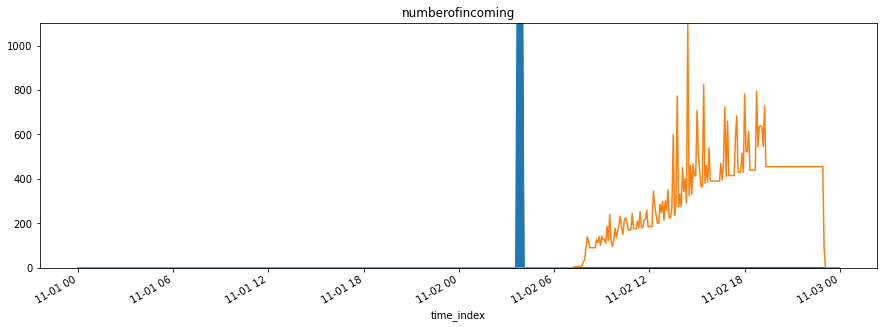

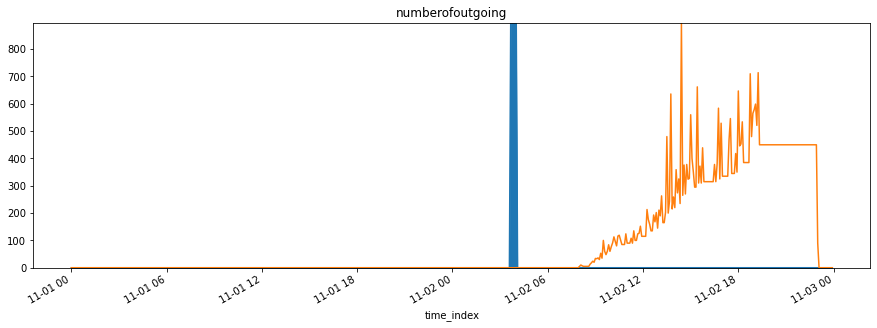

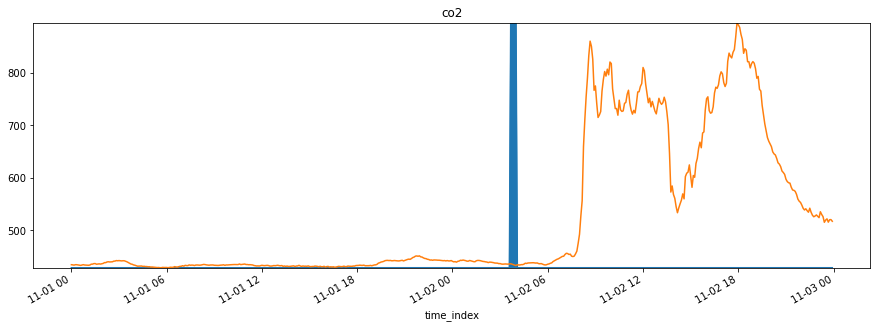

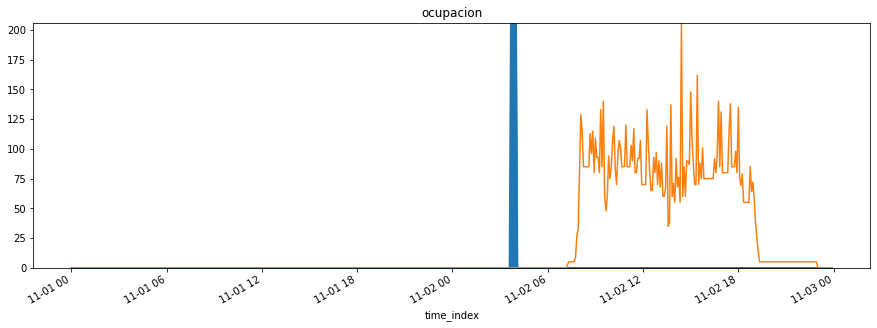

In [23]:
for var in df.columns[:-3]:
    plot_var(df.loc['2021-11-1':'2021-11-2'], var)

In [85]:
(df_bueno.ocupacion % 5 != 0).sum()

1700

<AxesSubplot:xlabel='time_index'>

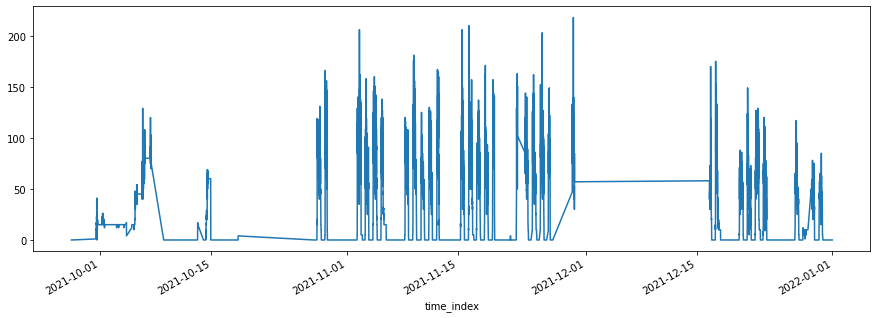

In [80]:

df_bueno.ocupacion.plot.line(figsize=(15,5))

In [11]:
df_bueno.ocupacion.value_counts()[:20]

0,00     10590
15,00     1282
5,00       341
80,00      327
45,00      316
60,00      275
10,00      271
40,00      189
35,00      177
75,00      174
70,00      168
50,00      147
30,00      141
20,00      130
65,00      117
55,00      110
85,00       98
25,00       69
95,00       55
90,00       51
Name: ocupacion, dtype: int64